<a href="https://colab.research.google.com/github/vvicky30/Deep_neural_Networks_PyToacrch/blob/master/MULTICLASS_one_layer_neural_network_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Neural Networks with One Hidden Layer</h1>

<h2>Table of Contents</h2>
<p>In this lab, you will use a single layer neural network to classify handwritten digits from the MNIST database.</p>

<ul>
    <li><a href="#Model">Neural Network Module and Training Function</a></li>
    <li><a href="#Makeup_Data">Make Some Data</a></li>
    <li><a href="#Train">Define the Neural Network, Optimizer, and Train the  Model</a></li>
    <li><a href="#Result">Analyze Results</a></li>
</ul>
<hr>

<h2>Preparation</h2>

We'll need the following libraries

In [1]:
# Import the libraries we need for this lab

# Using the following line code to install the torchvision library
# !conda install -y torchvision

import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np

Use the following helper functions for plotting the loss: 

In [2]:
# Define a function to plot accuracy and loss

def plot_accuracy_loss(training_results): 
    plt.subplot(2, 1, 1)
    plt.plot(training_results['training_loss'], 'r')
    plt.ylabel('loss')
    plt.title('training loss iterations')
    plt.subplot(2, 1, 2)
    plt.plot(training_results['validation_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epochs')   
    plt.show()

Use the following function for printing the model parameters: 

In [3]:
# Define a function to plot model parameters

def print_model_parameters(model):
    count = 0
    for ele in model.state_dict():
        count += 1
        if count % 2 != 0:
            print ("The following are the parameters for the layer ", count // 2 + 1)
        if ele.find("bias") != -1:
            print("The size of bias: ", model.state_dict()[ele].size())
        else:
            print("The size of weights: ", model.state_dict()[ele].size())

Define the neural network module or class: 

In [4]:
# Define a function to display data   

def show_data(data_sample):
    plt.imshow(data_sample.numpy().reshape(28, 28), cmap='gray')
    plt.show()

<!--Empty Space for separating topics-->

<h2 id="Model">Neural Network Module and Training Function</h2> 

Define the neural network module or class: 

In [5]:
# Define a Neural Network class

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction    
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x)) #activation function for hidden layer(here:sigmoid) 
        x = self.linear2(x)  #thire is no activation function as it's been reamined as linear regression for softmax prediction for multi-class classification
        return x

Define a function to train the model. In this case, the function returns a Python dictionary to store the training loss and accuracy on the validation data. 

In [6]:
# Define a training function to train the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = {'training_loss': [],'validation_accuracy': []}  
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader): 
            optimizer.zero_grad()  #ressting
            z = model(x.view(-1, 28 * 28))  #converting x's values to the row tensors 'x.view(-1, 28 * 28)'
            loss = criterion(z, y)
            loss.backward() #derivative
            optimizer.step() #updations
             #loss for every iteration
            useful_stuff['training_loss'].append(loss.data.item())  
        correct = 0
        for x, y in validation_loader:
            #validation 
            z = model(x.view(-1, 28 * 28)) #converting x's values to the row tensors  'x.view(-1, 28 * 28)'
            _, label = torch.max(z, 1) #'_' for storing last expression of interpreter in specific variable (HERE: label) &'max(z, 1)' for applying argmax-fn
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
         #accuracy for every iteration
        useful_stuff['validation_accuracy'].append(accuracy)
    return useful_stuff

<!--Empty Space for separating topics-->

<h2 id="Makeup_Data">Make Some Data</h2> 

Load the training dataset by setting the parameters <code>train</code> to <code>True</code> and convert it to a tensor by placing a transform object in the argument <code>transform</code>.

In [7]:
# Create training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Load the testing dataset by setting the parameters <code>train</code> to <code>False</code> and convert it to a tensor by placing a transform object in the argument <code>transform</code>:

In [8]:
# Create validating dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

Create the criterion function:  

In [9]:
# Create criterion function

criterion = nn.CrossEntropyLoss()

Create the training-data loader and the validation-data loader objects: 

In [10]:
# Create data loader for both train dataset and valdiate dataset

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

<!--Empty Space for separating topics-->

<h2 id="Train">Define the Neural Network, Optimizer, and Train the Model</h2> 

Create the model with 100 neurons: 

In [11]:
# Create the model with 100 neurons

input_dim = 28 * 28
hidden_dim = 100  #(100 neurons in hidden layer 
output_dim = 10  #10 no. of outputs as there are 10 classes i.e. 0 to 9

model = Net(input_dim, hidden_dim, output_dim)

Print the model parameters: 

In [13]:
# Print the parameters for model

print_model_parameters(model)
"""
here for layer 1:
The size of weights:  torch.Size([100, 784])
where there is 100 weights as hidden layer has 100 nueron(or 100 output of hidden layers)
each weights has 784 elements due to the no. of inputs on hidden layer (or input_dim)
The size of bias:  torch.Size([100])
where there is 100 biases as hidden layer has 100 nueron(or 100 output of hidden layers)

for layer 2:
The size of weights:  torch.Size([10, 100])
where weights are 10 as output layer has 10 nuerons (or 10 no. of outputs of output layer i.e. output_dim)
each weights has 100 elemnts due to the output of hidden layers worked as input for output layer
The size of bias:  torch.Size([10])
where biases are 10 as output layer has 10 nuerons (or 10 no. of outputs of output layer i.e. output_dim)
""" 



The following are the parameters for the layer  1
The size of weights:  torch.Size([100, 784])
The size of bias:  torch.Size([100])
The following are the parameters for the layer  2
The size of weights:  torch.Size([10, 100])
The size of bias:  torch.Size([10])


'\nhere for layer 1:\nThe size of weights:  torch.Size([100, 784])\nwhere there is 100 weights as hidden layer has 100 nueron(or 100 output of hidden layers)\neach weights has 784 elements due to the no. of inputs on hidden layer (or input_dim)\nThe size of bias:  torch.Size([100])\nwhere there is 100 biases as hidden layer has 100 nueron(or 100 output of hidden layers)\n\nfor layer 2:\nThe size of weights:  torch.Size([10, 100])\nwhere weights are 10 as output layer has 10 nuerons (or 10 no. of outputs of output layer i.e. output_dim)\neach weights has 100 elemnts due to the output of hidden layers worked as input for output layer\nThe size of bias:  torch.Size([10])\nwhere biases are 10 as output layer has 10 nuerons (or 10 no. of outputs of output layer i.e. output_dim)\n'

Define the optimizer object with a learning rate of 0.01: 

In [14]:
# Set the learning rate and the optimizer

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Train the model by using 100 epochs **(this process takes time)**: 

In [15]:
# Train the model

training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=30)

In [16]:
training_results

{'training_loss': [2.3648734092712402,
  2.3484721183776855,
  2.3478190898895264,
  2.3531596660614014,
  2.3505396842956543,
  2.345020294189453,
  2.3450567722320557,
  2.3366622924804688,
  2.332368850708008,
  2.331615686416626,
  2.331925630569458,
  2.3332648277282715,
  2.324552059173584,
  2.3334150314331055,
  2.3264360427856445,
  2.3296148777008057,
  2.3220181465148926,
  2.3186168670654297,
  2.3173470497131348,
  2.3215396404266357,
  2.317631721496582,
  2.3157119750976562,
  2.3155629634857178,
  2.3117854595184326,
  2.3132364749908447,
  2.314629554748535,
  2.311326742172241,
  2.3048882484436035,
  2.3140368461608887,
  2.3099422454833984,
  2.3080503940582275,
  2.3072054386138916,
  2.3045101165771484,
  2.3040249347686768,
  2.2999634742736816,
  2.301542282104492,
  2.3050968647003174,
  2.3064475059509277,
  2.3032002449035645,
  2.3020427227020264,
  2.301088571548462,
  2.300302267074585,
  2.3021044731140137,
  2.2992818355560303,
  2.301407814025879,
  2.2

<!--Empty Space for separating topics-->

<h2 id="Result">Analyze Results</h2> 

Plot the training total loss or cost for every iteration and plot the training accuracy for every epoch:  

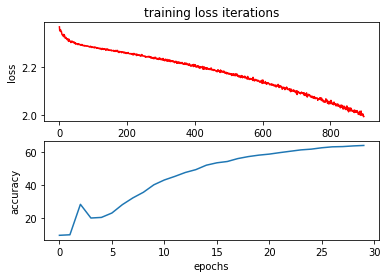

In [17]:
# Plot the accuracy and loss

plot_accuracy_loss(training_results)

Plot the first five misclassified samples:   

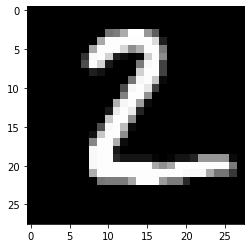

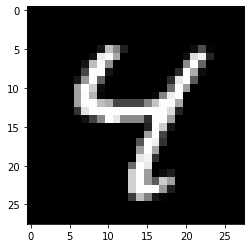

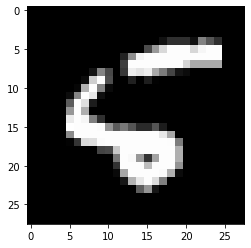

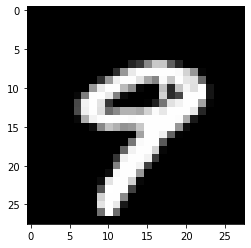

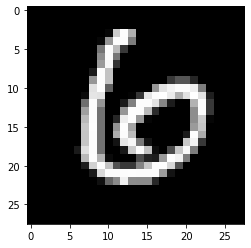

In [18]:
# Plot the first five misclassified samples

count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _,yhat = torch.max(z, 1)
    if yhat != y:
        show_data(x)
        count += 1
    if count >= 5:
        break

Use <code>nn.Sequential</code> to build exactly the same model as you just built. Use the function <train>train</train> to train the model and use the function <code>plot_accuracy_loss</code> to see the metrics. Also, try different epoch numbers. 

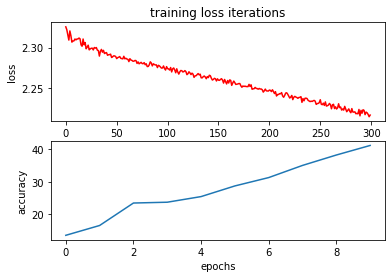

In [19]:
# Practice: Use nn.Sequential to build the same model. Use plot_accuracy_loss to print out the accuarcy and loss
input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = torch.nn.Sequential(
    torch.nn.Linear(input_dim, hidden_dim),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_dim, output_dim),
)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs = 10)
plot_accuracy_loss(training_results)